## Handling Imbalanced Dataset

1. Up Sampling
2. Down Sampling

In [2]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility...Here We are Selecting the Randome values , Which Schould not Change  
np.random.seed(123)

# Create a dataframe with two classes... Here we have Created 2 Classes 
n_samples = 1000 # Total No of Data-Points / Samples ...
class_0_ratio = 0.9     
n_class_0 = int(n_samples * class_0_ratio) # n_class_0 = n_samples * class_0_ratio = 1000*0.9 = 900  
n_class_1 = n_samples - n_class_0       # n_class_1 = n_samples - n_class_0 = 1000-900  = 100

In [3]:
n_class_0,n_class_1  ## Here are Both the Classes 1) n_class_0 = Majority  2) n_class_1 = Minority 

(900, 100)

In [4]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
# Here we are Creating a Imbalanced Dataset...
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

# 'target': [0] * n_class_0  :- This ("class_0") DataFrame... By Using This 900  Zeros will be created Becoz , {'target': [0]} of this...

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

# 'target': [1] * n_class_1  :- This ("class_1") DataFrame... By Using This 100  Ones will be created Becoz , {'target': [1]} of this...

In [5]:
df=pd.concat([class_0,class_1]).reset_index(drop=True) # Here To Merge Both the Classes,, Together and start from index 1.... Make a Single Data-Frame 

# Here (Drop=True) will Merge both the Class Toghether and form a Data-Frame Permnantely... Make a Single Data-Frame 

In [6]:
df.tail() # Will Show Last 5 Data-Points 

# Here 1st 900 Data-points are - 0 and 
# last 100 Data-points are - 1

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [7]:
df['target'].value_counts()

## BY this We have created a Imbalanced Datset Succesfully .... In this 1000 Whole Data-points , In that 900 are 0 (Minority) and 100 are 1(Majority) 

target
0    900
1    100
Name: count, dtype: int64

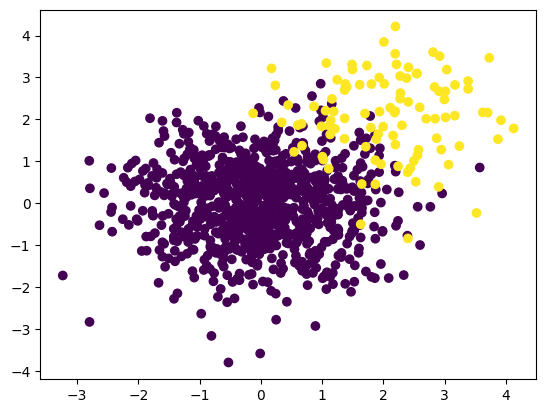

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df['feature_1'],df['feature_2'],c=df['target'])
#  Here Yellow = Minority , and Purple/Violet = Majority 

In [11]:
## upsampling:-  
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [12]:
# So In Up-Sampling we :- Increaes the Data-points for Minority ... So Now to Increase / create the Data-points... we use one library called "resample"
# This Library will help to -Increase /Create Data-points for Minority... Also try to Equalize the "Data".....try to Make balanced the Data 

from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample will get added With replacement....that's the meaning of "replace=true"
         n_samples=len(df_majority), # Here Jitne length of Data-points Majority kai hai ...Utni hi length of Data-Points Minority kai bhi Hone Chanhiye ... Toh utne Data-points resample Increase Karega in "Minority"
         random_state=42
        )

In [18]:
df_minority_upsampled.shape

(900, 3)

In [21]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [18]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled]) # Here we are Con-Cating Both the Class Dataframes 

In [24]:
df_upsampled['target'].value_counts() # Here We have Balanced the Data ... So you can see Both the Data-points are Eqaual..For Minority and Majority as well
# and we have done this By using "Up-Sampling " where we have Created /Increase the Data-points for "Minority" and try to make it equal to "Majority"... 

target
0    900
1    900
Name: count, dtype: int64

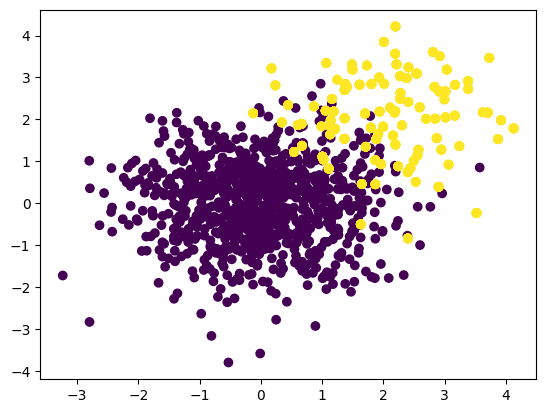

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_upsampled['feature_1'],df_upsampled['feature_2'],c=df_upsampled['target'])

# Here You Can see As we have leran the Concepts .... Data-points are Increases on the Same Place...... Hence there is no Expansion of "Data"
#  Here Yellow = Minority , and Purple/Violet = Majority 

## Down Sampling

In [4]:
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

# Check the class distribution
print(df['target'].value_counts())

target
0    900
1    100
Name: count, dtype: int64


In [5]:
## downsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [6]:
from sklearn.utils import resample
df_majority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

# So In Down-Sampling we :- Decresses the Data-points for Majority ... So Now to Decreses the Data-points... we use one library called "resample"
# This Library will help to -Decreses Data-points for Majority... Also try to Equalize the "Data".....try to Make balanced the Data 


In [9]:
df_downsampled=pd.concat([df_majority,df_majority_upsampled]) # Here we are Con-Cating Both the Class 

In [12]:
df_downsampled['target'].value_counts()
# Here We have Balanced the Data ... So you can see Both the Data-points are Eqaual..For Minority and Majority as well
# and we have done this By using "Down-Sampling " where we have Decreses the Data-points for "Majority" and try to make it equal to "Minority"... 

target
0    900
1    900
Name: count, dtype: int64